In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df=sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [7]:
#chaning categoric to numeric
categoric_columns =['sex','smoker','day','time']
for column in categoric_columns:
    df[column] = pd.Categorical(df[column]).codes
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,1,3,1,2
1,10.34,1.66,0,1,3,1,3
2,21.01,3.50,0,1,3,1,3
3,23.68,3.31,0,1,3,1,2
4,24.59,3.61,1,1,3,1,4
...,...,...,...,...,...,...,...
239,29.03,5.92,0,1,2,1,3
240,27.18,2.00,1,0,2,1,2
241,22.67,2.00,0,0,2,1,2
242,17.82,1.75,0,1,2,1,2


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('tip', axis=1), df['tip'], test_size=0.2, random_state=42)



In [14]:
from pycaret.regression import *
regression_setup= setup(data=df,
                        target='tip',
                        session_id=123,
                        normalize=True,
                        polynomial_features=True,
                        remove_multicollinearity=True,
                        experiment_name='tips_regression',
                        verbose=False,
                        log_experiment=False,
   
   )


In [15]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,0.7654,0.9841,0.9816,0.2605,0.2408,0.3005,0.0110
ridge,Ridge Regression,0.7561,0.9492,0.9639,0.2468,0.2402,0.3012,0.0100
lr,Linear Regression,0.7608,0.9504,0.9649,0.2391,0.2419,0.3058,0.5420
huber,Huber Regressor,0.7627,0.9861,0.9779,0.2370,0.2420,0.2966,0.0110
br,Bayesian Ridge,0.7795,0.9954,0.9871,0.2300,0.2435,0.3088,0.0130
ada,AdaBoost Regressor,0.8224,1.1069,1.0389,0.1412,0.2641,0.3477,0.0210
knn,K Neighbors Regressor,0.8291,1.1403,1.0470,0.1398,0.2618,0.3210,0.0120
lightgbm,Light Gradient Boosting Machine,0.8037,1.1275,1.0440,0.1076,0.2556,0.3129,0.0300
rf,Random Forest Regressor,0.8179,1.1833,1.0640,0.0885,0.2611,0.3167,0.0400
en,Elastic Net,0.9123,1.3112,1.1351,0.0360,0.2872,0.3823,0.0110


In [16]:
print(best_model)

OrthogonalMatchingPursuit()


In [18]:
tuned_model = tune_model(best_model, 
                        optimize='R2',)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6868,1.1888,1.0903,0.2292,0.2378,0.2042
1,0.7427,0.9086,0.9532,0.2812,0.2125,0.2659
2,0.7733,0.9943,0.9972,0.1749,0.2484,0.2935
3,0.7155,0.7399,0.8602,0.6171,0.1829,0.2183
4,0.7836,1.2802,1.1314,0.2799,0.2660,0.2463
5,0.8049,0.8416,0.9174,-0.3388,0.2584,0.3985
6,0.5756,0.4831,0.6950,0.2723,0.2146,0.3060
7,0.8351,1.0952,1.0465,0.2895,0.2596,0.3784
8,0.7746,0.8087,0.8993,0.4793,0.2506,0.3623


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


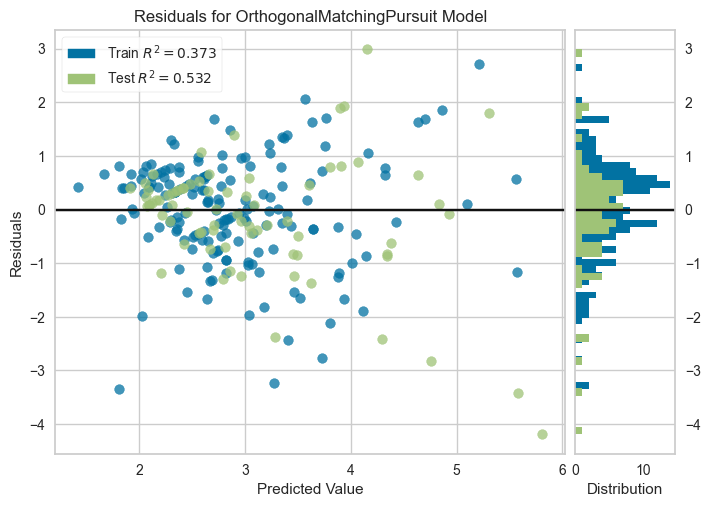

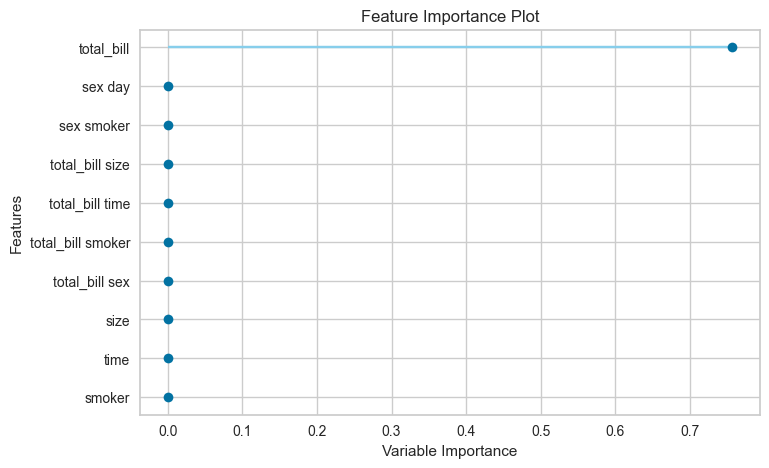

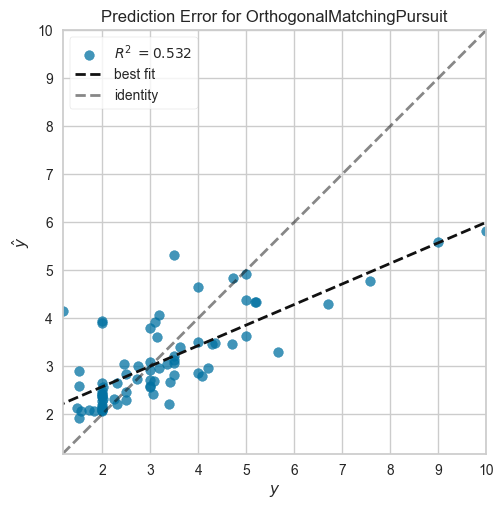

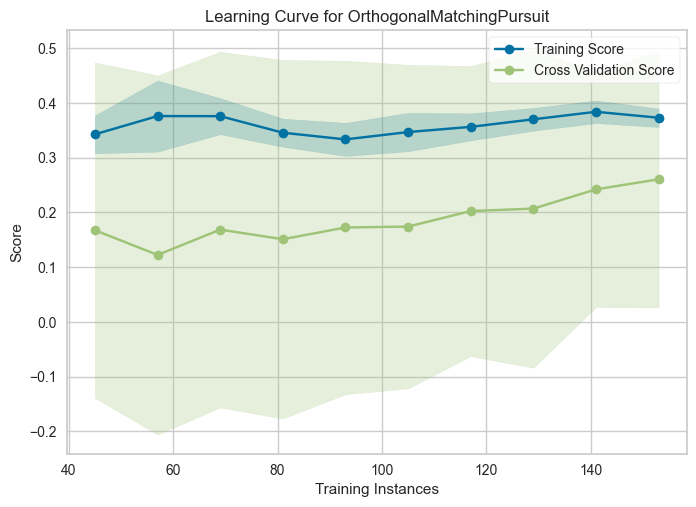

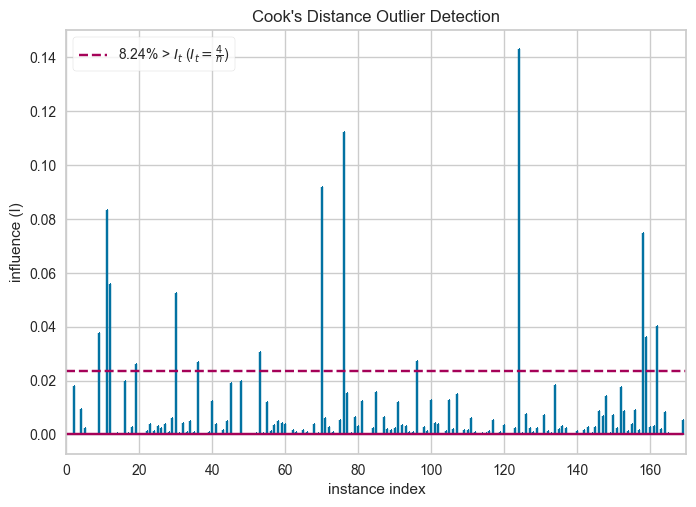

In [21]:
#Evaluate the model
plot_model(tuned_model, plot='residuals')
plot_model(tuned_model, plot='feature')
plot_model(tuned_model, plot='error')
plot_model(tuned_model, plot='learning')
plot_model(tuned_model, plot='cooks')

